In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df_train = pd.read_csv("../data/train_imputed.csv")
df_weather = pd.read_csv("../data/weather_data_cleaned.csv")

In [36]:
df_train.set_index("id", inplace=True)
df_train.index = pd.to_datetime(df_train.index)

In [37]:
df_weather.set_index("date", inplace=True)

In [38]:
df_train = df_train.rename_axis("date")


In [39]:
df_train

,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
date,,,,,
2020-01-01 00:00:00,42.900000,0.718000,15.7,73.1,64.4
2020-01-01 01:00:00,33.600000,0.587000,10.1,74.8,66.0
2020-01-01 02:00:00,29.300000,0.447374,5.1,51.0,44.9
2020-01-01 03:00:00,30.500000,0.246000,7.2,27.7,25.1
2020-01-01 04:00:00,29.300000,0.204000,8.3,15.3,13.6
...,...,...,...,...,...
2024-09-03 18:00:00,24.737806,0.222000,55.1,12.0,5.3
2024-09-03 19:00:00,26.877610,0.245000,48.2,13.4,7.0
2024-09-03 20:00:00,24.648191,0.234000,44.5,12.4,7.1


In [40]:
df_weather

,RR1,T,TN,TX,DG
date,,,,,
2020-01-01 00:00:00,0.0,1.6,1.1,1.9,0.0
2020-01-01 01:00:00,0.0,0.9,0.9,1.7,0.0
2020-01-01 02:00:00,0.0,0.1,-0.2,0.8,44.0
2020-01-01 03:00:00,0.0,0.2,0.1,0.2,0.0
2020-01-01 04:00:00,0.0,0.6,0.2,0.6,0.0
...,...,...,...,...,...
2024-10-28 23:00:00,0.2,12.7,12.7,13.1,0.0
2024-10-29 00:00:00,0.0,12.2,12.2,12.7,0.0
2024-10-29 01:00:00,0.0,12.0,12.0,12.2,0.0


In [41]:
# Ensure both dataframes have a datetime index if they don’t already
df_train.index = pd.to_datetime(df_train.index)
df_weather.index = pd.to_datetime(df_weather.index)

# Combine using join on the "date" index
df_combined = df_train.join(df_weather, how="inner")


In [42]:
df_combined

,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,RR1,T,TN,TX,DG
date,,,,,,,,,,
2020-01-01 00:00:00,42.900000,0.718000,15.7,73.1,64.4,0.0,1.6,1.1,1.9,0.0
2020-01-01 01:00:00,33.600000,0.587000,10.1,74.8,66.0,0.0,0.9,0.9,1.7,0.0
2020-01-01 02:00:00,29.300000,0.447374,5.1,51.0,44.9,0.0,0.1,-0.2,0.8,44.0
2020-01-01 03:00:00,30.500000,0.246000,7.2,27.7,25.1,0.0,0.2,0.1,0.2,0.0
2020-01-01 04:00:00,29.300000,0.204000,8.3,15.3,13.6,0.0,0.6,0.2,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...
2024-09-03 18:00:00,24.737806,0.222000,55.1,12.0,5.3,0.0,20.3,20.3,20.8,0.0
2024-09-03 19:00:00,26.877610,0.245000,48.2,13.4,7.0,0.0,20.2,20.1,20.4,0.0
2024-09-03 20:00:00,24.648191,0.234000,44.5,12.4,7.1,0.0,19.7,19.7,20.3,0.0


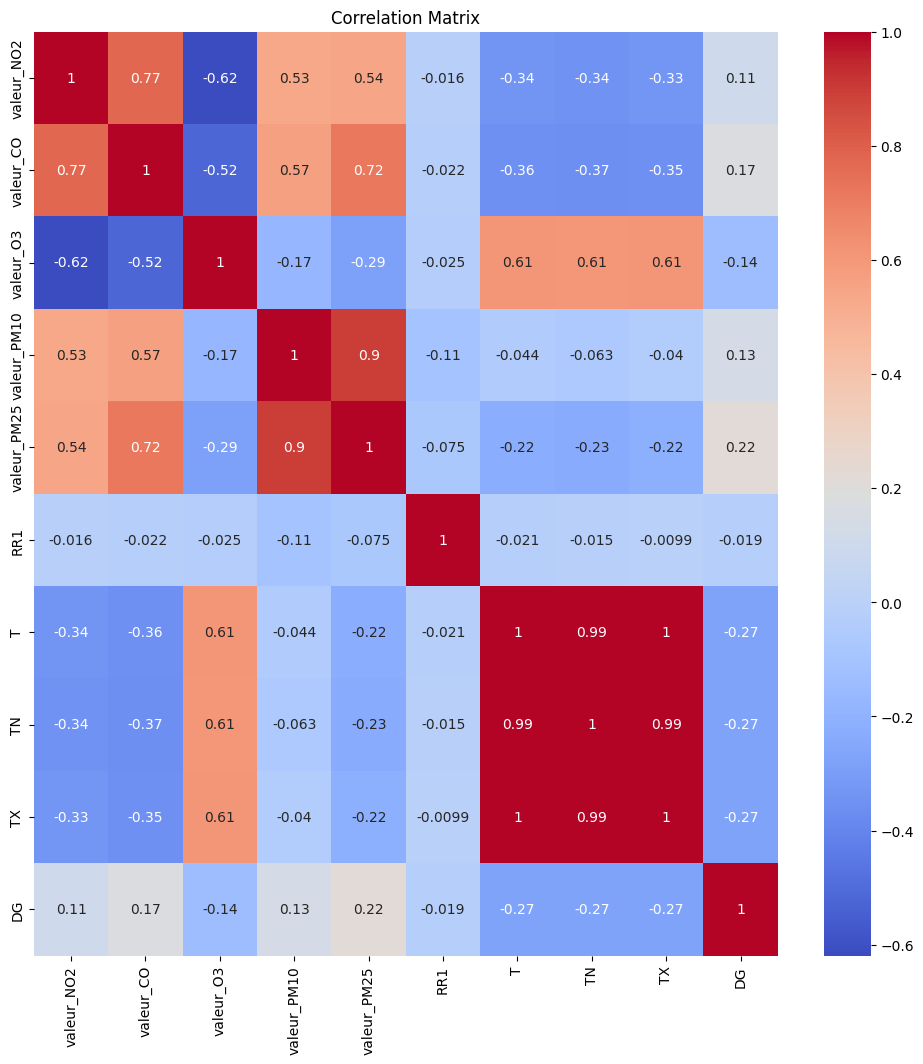

In [43]:
# Correlation matrix
corr = df_combined.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [44]:
# Selecting the columns for modeling O3
y = df_combined["valeur_O3"]
X = df_combined.drop(
    columns=["valeur_O3", "valeur_PM10", "valeur_PM25", "valeur_NO2", "valeur_CO"]
)

In [48]:
X.reset_index(drop=False, inplace=True)

In [49]:
X

,date,RR1,T,TN,TX,DG
0,2020-01-01 00:00:00,0.0,1.6,1.1,1.9,0.0
1,2020-01-01 01:00:00,0.0,0.9,0.9,1.7,0.0
2,2020-01-01 02:00:00,0.0,0.1,-0.2,0.8,44.0
3,2020-01-01 03:00:00,0.0,0.2,0.1,0.2,0.0
4,2020-01-01 04:00:00,0.0,0.6,0.2,0.6,0.0
...,...,...,...,...,...,...
40986,2024-09-03 18:00:00,0.0,20.3,20.3,20.8,0.0
40987,2024-09-03 19:00:00,0.0,20.2,20.1,20.4,0.0
40988,2024-09-03 20:00:00,0.0,19.7,19.7,20.3,0.0
40989,2024-09-03 21:00:00,0.0,19.2,18.6,19.7,0.0


In [50]:
# Create time features
X["month"] = X["date"].dt.month
X["day"] = X["date"].dt.day
X["hour"] = X["date"].dt.hour
X["weekday"] = X["date"].dt.weekday


In [53]:
from pandas.tseries.holiday import (
    AbstractHolidayCalendar,
    Holiday,
    Easter,
    EasterMonday,
)
from pandas.tseries.holiday import nearest_workday


class FranceHolidayCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday("New Year's Day", month=1, day=1),
        Holiday("Labour Day", month=5, day=1),
        Holiday("Victory in Europe Day", month=5, day=8),
        Holiday("Bastille Day", month=7, day=14),
        Holiday("Assumption of Mary", month=8, day=15),
        Holiday("All Saints' Day", month=11, day=1),
        Holiday("Armistice Day", month=11, day=11),
        Holiday("Christmas Day", month=12, day=25),
        EasterMonday,
    ]


cal = FranceHolidayCalendar()
holidays = cal.holidays(start=X["date"].min(), end=X["date"].max())
X["holiday"] = X["date"].isin(holidays)


In [55]:
X["holiday"] = X["holiday"].astype(int)

In [57]:
X.drop(columns=["date"], inplace=True)

In [58]:
X

,RR1,T,TN,TX,DG,month,day,hour,weekday,holiday
0,0.0,1.6,1.1,1.9,0.0,1,1,0,2,1
1,0.0,0.9,0.9,1.7,0.0,1,1,1,2,0
2,0.0,0.1,-0.2,0.8,44.0,1,1,2,2,0
3,0.0,0.2,0.1,0.2,0.0,1,1,3,2,0
4,0.0,0.6,0.2,0.6,0.0,1,1,4,2,0
...,...,...,...,...,...,...,...,...,...,...
40986,0.0,20.3,20.3,20.8,0.0,9,3,18,1,0
40987,0.0,20.2,20.1,20.4,0.0,9,3,19,1,0
40988,0.0,19.7,19.7,20.3,0.0,9,3,20,1,0
40989,0.0,19.2,18.6,19.7,0.0,9,3,21,1,0


In [59]:
y

date
2020-01-01 00:00:00    15.7
2020-01-01 01:00:00    10.1
2020-01-01 02:00:00     5.1
2020-01-01 03:00:00     7.2
2020-01-01 04:00:00     8.3
                       ... 
2024-09-03 18:00:00    55.1
2024-09-03 19:00:00    48.2
2024-09-03 20:00:00    44.5
2024-09-03 21:00:00    25.9
2024-09-03 22:00:00    37.7
Name: valeur_O3, Length: 40991, dtype: float64

In [60]:
# Splitting the data into training and testing sets
split_ratio = 0.7  # 70% train, 15% validation, 15% test
train_size = int(len(X) * split_ratio)
val_size = int(len(X) * (1 - split_ratio) / 2)

X_train, X_val, X_test = (
    X[:train_size],
    X[train_size : train_size + val_size],
    X[train_size + val_size :],
)
y_train, y_val, y_test = (
    y[:train_size],
    y[train_size : train_size + val_size],
    y[train_size + val_size :],
)


In [83]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim


In [87]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [88]:
# Dataset class
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_len=24):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)
        self.seq_len = seq_len

    def __len__(self):
        return len(self.X) - self.seq_len

    def __getitem__(self, idx):
        return self.X[idx : idx + self.seq_len], self.y[idx + self.seq_len]


# LSTM model definition
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        return self.fc(hn[-1])


In [89]:
# Load data onto the device
train_dataset = TimeSeriesDataset(X_train, y_train)
val_dataset = TimeSeriesDataset(X_val, y_val)
test_dataset = TimeSeriesDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [90]:
# Initialize model, criterion, and optimizer
model = LSTMModel(input_size=10, hidden_size=64, num_layers=2, output_size=1).to(device)
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [91]:
# Training loop
for epoch in range(10):
    model.train()
    running_loss = 0.0
    for i, (X_batch, y_batch) in enumerate(train_loader):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        y_pred = model(X_batch).squeeze()  # Squeeze to match y_batch shape
        loss = criterion(y_pred, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 0:
            print(f"Epoch {epoch}, Step {i}, Training Loss {loss.item()}")

    # Calculate and log average validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            y_val_pred = model(X_val_batch).squeeze()
            val_loss += criterion(y_val_pred, y_val_batch).item()
    val_loss /= len(val_loader)
    print(f"Epoch {epoch}, Validation Loss {val_loss}")
    print()


Epoch 0, Step 0, Training Loss 48.9716796875
Epoch 0, Step 100, Training Loss 44.70256042480469
Epoch 0, Step 200, Training Loss 36.24958801269531
Epoch 0, Step 300, Training Loss 29.81466293334961
Epoch 0, Step 400, Training Loss 30.942522048950195
Epoch 0, Validation Loss 28.423984934886295

Epoch 1, Step 0, Training Loss 25.004497528076172
Epoch 1, Step 100, Training Loss 22.88178825378418
Epoch 1, Step 200, Training Loss 21.372756958007812
Epoch 1, Step 300, Training Loss 24.068815231323242
Epoch 1, Step 400, Training Loss 21.341089248657227
Epoch 1, Validation Loss 20.110691606998444

Epoch 2, Step 0, Training Loss 21.80463218688965
Epoch 2, Step 100, Training Loss 20.38094711303711
Epoch 2, Step 200, Training Loss 18.530635833740234
Epoch 2, Step 300, Training Loss 16.629837036132812
Epoch 2, Step 400, Training Loss 19.225215911865234
Epoch 2, Validation Loss 17.925769875446957

Epoch 3, Step 0, Training Loss 16.04672622680664
Epoch 3, Step 100, Training Loss 17.65911102294922
Ep

Test Loss 12.846223736802736


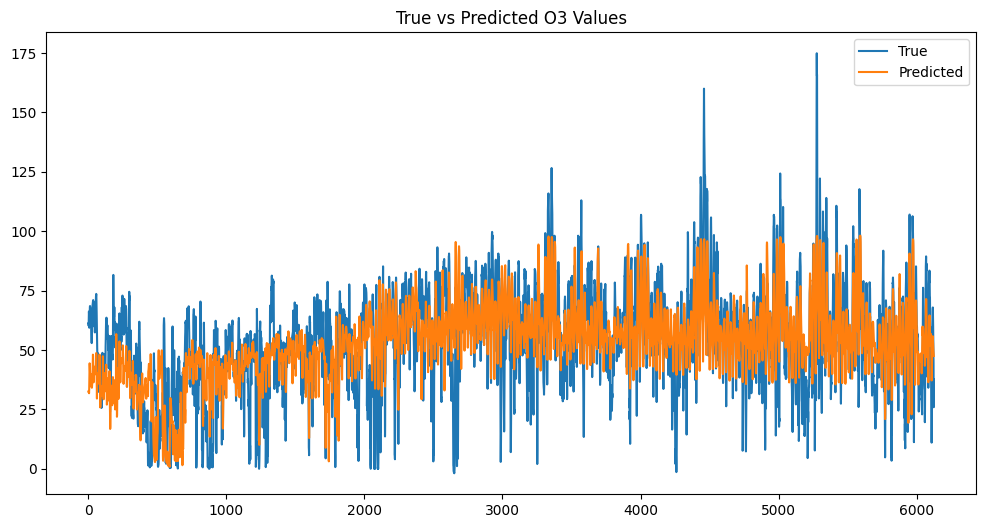

In [92]:
# Evaluate the model on the test set
model.eval()
test_loss = 0.0
y_true = []
y_pred = []
with torch.no_grad():
    for X_test_batch, y_test_batch in test_loader:
        X_test_batch, y_test_batch = X_test_batch.to(device), y_test_batch.to(device)
        y_test_pred = model(X_test_batch).squeeze()
        test_loss += criterion(y_test_pred, y_test_batch).item()
        y_true.extend(y_test_batch.cpu().numpy())
        y_pred.extend(y_test_pred.cpu().numpy())
test_loss /= len(test_loader)
print(f"Test Loss {test_loss}")

# Plot the true and predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_true, label="True")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("True vs Predicted O3 Values")
plt.show()


In [93]:
y

date
2020-01-01 00:00:00    15.7
2020-01-01 01:00:00    10.1
2020-01-01 02:00:00     5.1
2020-01-01 03:00:00     7.2
2020-01-01 04:00:00     8.3
                       ... 
2024-09-03 18:00:00    55.1
2024-09-03 19:00:00    48.2
2024-09-03 20:00:00    44.5
2024-09-03 21:00:00    25.9
2024-09-03 22:00:00    37.7
Name: valeur_O3, Length: 40991, dtype: float64

In [94]:
import prophet

df_prophet = df_combined[["valeur_O3"]].reset_index()
df_prophet.columns = ["ds", "y"]

c:\Users\ameya\miniconda3\envs\air\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [95]:
df_prophet

,ds,y
0,2020-01-01 00:00:00,15.7
1,2020-01-01 01:00:00,10.1
2,2020-01-01 02:00:00,5.1
3,2020-01-01 03:00:00,7.2
4,2020-01-01 04:00:00,8.3
...,...,...
40986,2024-09-03 18:00:00,55.1
40987,2024-09-03 19:00:00,48.2
40988,2024-09-03 20:00:00,44.5
40989,2024-09-03 21:00:00,25.9


In [138]:
train_prophet = df_prophet[: train_size + val_size]
test_prophet = df_prophet[train_size + val_size :]

model_prophet = prophet.Prophet(
    yearly_seasonality=True,
    interval_width=0.95,
)
model_prophet.add_country_holidays(country_name="FR")
model_prophet.add_seasonality(name="monthly", period=30.5, fourier_order=5)
# model_prophet.add_seasonality(name="daily", period=1, fourier_order=15)
# model_prophet.add_seasonality(name="weekly", period=7, fourier_order=10)

model_prophet.fit(train_prophet)

17:34:22 - cmdstanpy - INFO - Chain [1] start processing
17:35:05 - cmdstanpy - INFO - Chain [1] done processing


In [132]:
test_prophet.reset_index(drop=True, inplace=True)

In [133]:
test_prophet

,ds,y
0,2023-12-22 17:00:00,61.2
1,2023-12-22 18:00:00,59.7
2,2023-12-22 19:00:00,56.8
3,2023-12-22 20:00:00,59.0
4,2023-12-22 21:00:00,56.4
...,...,...
6145,2024-09-03 18:00:00,55.1
6146,2024-09-03 19:00:00,48.2
6147,2024-09-03 20:00:00,44.5
6148,2024-09-03 21:00:00,25.9


In [134]:
# Calculate the number of hours between the last training timestamp and the last test timestamp
last_train_time = train_prophet["ds"].iloc[-1]
last_test_time = test_prophet["ds"].iloc[-1]
hours_diff = int((last_test_time - last_train_time) / pd.Timedelta(hours=1))

print(f"Hours difference: {hours_diff}")
# Create future dates directly up to the last date in test_prophet
future = pd.DataFrame(
    pd.date_range(
        start=last_train_time + pd.Timedelta(hours=1), periods=hours_diff, freq="H"
    ),
    columns=["ds"],
)
future

Hours difference: 6150


C:\Users\ameya\AppData\Local\Temp\ipykernel_19344\215810690.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(


,ds
0,2023-12-22 17:00:00
1,2023-12-22 18:00:00
2,2023-12-22 19:00:00
3,2023-12-22 20:00:00
4,2023-12-22 21:00:00
...,...
6145,2024-09-03 18:00:00
6146,2024-09-03 19:00:00
6147,2024-09-03 20:00:00
6148,2024-09-03 21:00:00


In [135]:
forecast = model_prophet.predict(future)

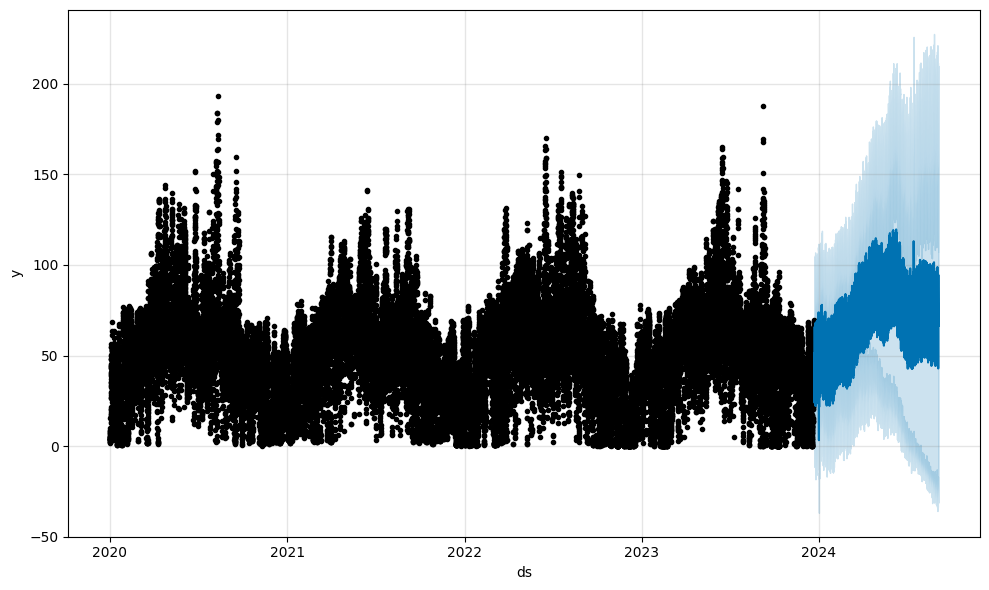

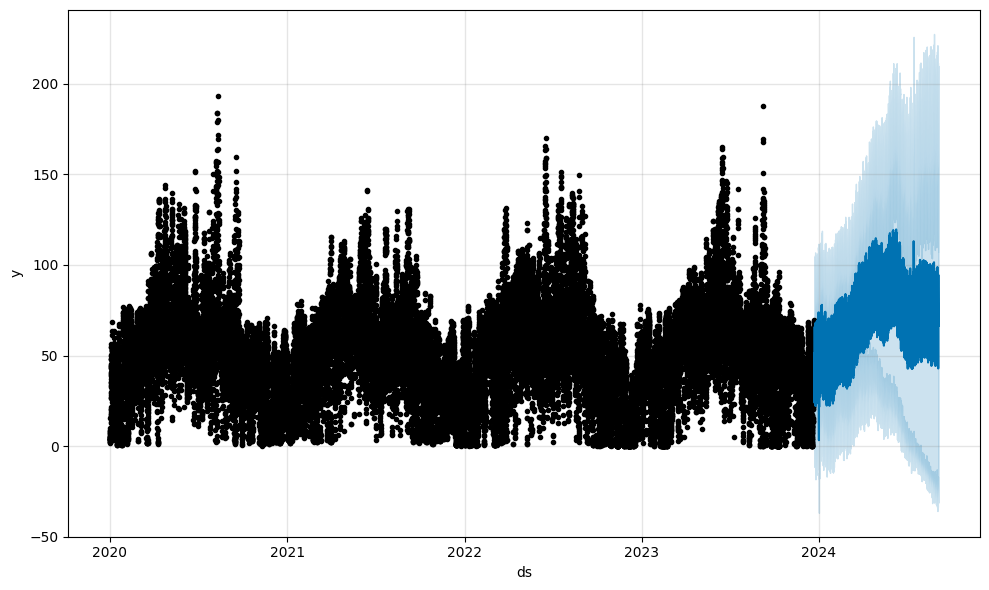

In [136]:
model_prophet.plot(forecast)

In [137]:
# Calculate the MAE
mae = np.mean(np.abs(test_prophet["y"] - forecast["yhat"]))
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 21.99189460702319


In [128]:
test_prophet

,ds,y
0,2023-12-22 17:00:00,61.2
1,2023-12-22 18:00:00,59.7
2,2023-12-22 19:00:00,56.8
3,2023-12-22 20:00:00,59.0
4,2023-12-22 21:00:00,56.4
...,...,...
6145,2024-09-03 18:00:00,55.1
6146,2024-09-03 19:00:00,48.2
6147,2024-09-03 20:00:00,44.5
6148,2024-09-03 21:00:00,25.9


In [129]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-12-22 17:00:00,55.031911,16.828011,67.328744,55.031911,55.031911,-12.544455,-12.544455,-12.544455,8.322723,...,-0.650338,-0.650338,-0.650338,-20.216840,-20.216840,-20.216840,0.0,0.0,0.0,42.487456
1,2023-12-22 18:00:00,55.032960,13.584301,61.051036,55.032960,55.032960,-16.972943,-16.972943,-16.972943,3.840129,...,-0.628137,-0.628137,-0.628137,-20.184936,-20.184936,-20.184936,0.0,0.0,0.0,38.060017
2,2023-12-22 19:00:00,55.034009,8.173748,58.452782,55.034009,55.034009,-20.466338,-20.466338,-20.466338,0.284189,...,-0.597503,-0.597503,-0.597503,-20.153023,-20.153023,-20.153023,0.0,0.0,0.0,34.567671
3,2023-12-22 20:00:00,55.035058,5.607947,57.550500,55.035058,55.035058,-22.619709,-22.619709,-22.619709,-1.940481,...,-0.558124,-0.558124,-0.558124,-20.121104,-20.121104,-20.121104,0.0,0.0,0.0,32.415349
4,2023-12-22 21:00:00,55.036107,6.342739,55.675796,55.036107,55.036107,-23.749771,-23.749771,-23.749771,-3.150824,...,-0.509769,-0.509769,-0.509769,-20.089178,-20.089178,-20.089178,0.0,0.0,0.0,31.286336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,2024-09-03 18:00:00,61.478091,35.508021,101.982493,39.738253,80.747983,9.748530,9.748530,9.748530,3.840129,...,-1.078717,-1.078717,-1.078717,6.987118,6.987118,6.987118,0.0,0.0,0.0,71.226622
6146,2024-09-03 19:00:00,61.479140,34.486929,100.487483,39.734319,80.753692,6.197665,6.197665,6.197665,0.284189,...,-1.068255,-1.068255,-1.068255,6.981730,6.981730,6.981730,0.0,0.0,0.0,67.676805
6147,2024-09-03 20:00:00,61.480190,33.517804,97.306025,39.730384,80.759401,3.976195,3.976195,3.976195,-1.940481,...,-1.059642,-1.059642,-1.059642,6.976318,6.976318,6.976318,0.0,0.0,0.0,65.456385
6148,2024-09-03 21:00:00,61.481239,27.646018,96.150281,39.726450,80.765111,2.767232,2.767232,2.767232,-3.150824,...,-1.052824,-1.052824,-1.052824,6.970881,6.970881,6.970881,0.0,0.0,0.0,64.248471
